In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

In [52]:
train_filepath='Microstructure-Stiffness Train Dataset.csv'
test_filepath='Microstructure-Stiffness Test Dataset.csv'

In [53]:
test_data=pd.read_csv(test_filepath)
train_data=pd.read_csv(train_filepath)

In [54]:
#print(data)

In [55]:
test_data = test_data.drop(columns=['Unnamed: 0'])
train_data = train_data.drop(columns=['Unnamed: 0'])

In [56]:
#data selecting to seperate material structure vector and stiffness value
test_x = test_data.iloc[:, :-1] 
test_y = test_data['stiffness_value'] 

train_x = train_data.iloc[:, :-1] 
train_y = train_data['stiffness_value'] 
#print(train_x,train_y)

In [57]:
#Grid Search for hyperparameter tuning (commented out due to long runtime)
# param_grid = {
#     'hidden_layer_sizes': [(55,55),(100,50),(50,25),(30,30),(50),(30)],
#     'alpha': [0.1,0.01,0.001],
#     'learning_rate_init': [0.01,0.001],
#     'activation': ['relu'],
#     'max_iter': [1000]
# }

# grid_search = GridSearchCV(MLPRegressor(max_iter=1000, random_state=42), param_grid, cv=None, scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=2)
# grid_search.fit(train_x, train_y)
# best_params = grid_search.best_params_
# print(best_params)

In [58]:
#k-fold cross validation setup
cv_rmse = []
cv_r2 = []
train_cv_rmse=[]
train_cv_r2=[]
kf = KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(train_x)):
    x_train_cv, x_cv = train_x.iloc[train_index], train_x.iloc[test_index]
    y_train_cv, y_cv = train_y.iloc[train_index], train_y.iloc[test_index]

    #DO MODEL FITTING AND TRAINING HERE
    simple_mlp = MLPRegressor(hidden_layer_sizes=(55,55), alpha=0.0001,learning_rate='adaptive',learning_rate_init=0.001,max_iter=1000, random_state=1)
    # Train the MLP on the training data
    simple_mlp.fit(x_train_cv, y_train_cv)
    # Predict on the test data
    y_train_pred = simple_mlp.predict(x_train_cv)
    tr_rmse = np.sqrt(mean_squared_error(y_train_cv, y_train_pred))
    tr_r2 = r2_score(y_train_cv, y_train_pred)
    train_cv_rmse.append(tr_rmse)
    train_cv_r2.append(tr_r2)
    
    #CROSS VALIDATION HERE
    y_cv_pred = simple_mlp.predict(x_cv)
    rmse = np.sqrt(mean_squared_error(y_cv, y_cv_pred))
    r2 = r2_score(y_cv, y_cv_pred)
    cv_rmse.append(rmse)
    cv_r2.append(r2)
    
#printing train data results
print(train_cv_rmse,train_cv_r2)
print(np.mean(train_cv_rmse))
print(np.mean(train_cv_r2))
#printing cross validation results
print(cv_rmse,cv_r2)
print(np.mean(cv_rmse))
print(np.mean(cv_r2))

[np.float64(1.5790206368962556), np.float64(1.6816815438918433), np.float64(1.768390545200618), np.float64(1.5525308772378041), np.float64(1.6549242382944107)] [0.9953912326659858, 0.9947570883366976, 0.994209185292974, 0.995513589306022, 0.9949181254198429]
1.6473095683041863
0.9949578442043044
[np.float64(1.8731778528396885), np.float64(2.082119529858514), np.float64(1.8482958591030505), np.float64(1.8313789832026421), np.float64(1.9044511400060478)] [0.9934126693418599, 0.99191927127285, 0.9936253369157884, 0.9938765039906483, 0.9932966768885032]
1.9078846730019887
0.9932260916819301


In [59]:
# Train the MLP on the training data
simple_mlp.fit(train_x, train_y)
# Predict on the test data
y_test_pred = simple_mlp.predict(test_x)
test_rmse = np.sqrt(mean_squared_error(test_y, y_test_pred))
test_r2 = r2_score(test_y, y_test_pred)
print(test_rmse, test_r2)

1.89344202632563 0.9930978167793708


In [60]:
#simple_mlp.coefs_

In [61]:
#model linear regression on whole training dataset
linear_model = LinearRegression()
linear_model.fit(train_x, train_y)
y_test_pred_linear = linear_model.predict(test_x)
test_rmse = np.sqrt(mean_squared_error(test_y, y_test_pred_linear))
test_r2 = r2_score(test_y, y_test_pred_linear)
print(test_rmse, test_r2)
linear_model.coef_

8.031691486332914 0.8758071782098176


array([ -1.22403787,   2.9952024 ,  11.0875891 ,  -0.91637125,
         6.15927802,  -0.37937552,   0.51098132,  -1.88023303,
         0.74068386,  -0.59984445, -15.47708737,   1.99876027,
       -10.11475509, -11.10605704,  14.31608299])

In [62]:
#ridge regluarization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(train_x, train_y)
y_ridge_pred=ridge_model.predict(test_x)
y_ridge_rmse=np.sqrt(mean_squared_error(test_y,y_ridge_pred))
ridge_r2=r2_score(test_y,y_ridge_pred)
print(y_ridge_rmse, ridge_r2)
ridge_model.coef_

8.032056439519378 0.8757958915223545


array([ -1.22403356,   2.99459176,  11.08594418,  -0.91629099,
         6.15599603,  -0.38076798,   0.51032129,  -1.87680816,
         0.73968156,  -0.60380311, -15.43282006,   2.00250921,
       -10.08522425, -10.97132062,  14.10864458])

In [63]:
#lasso regluarization
lasso_model = Lasso(alpha=0.25)
lasso_model.fit(train_x, train_y)
y_lasso_pred=lasso_model.predict(test_x)
y_lasso_rmse=np.sqrt(mean_squared_error(test_y,y_lasso_pred))
lasso_r2=r2_score(test_y,y_lasso_pred)
print(y_lasso_rmse, lasso_r2)
lasso_model.coef_

8.524286200617935 0.8601061881495298


array([ -1.22240044,   2.774187  ,  10.83400995,  -0.64966118,
         5.05910321,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        , -10.97880127,   0.        ,
        -5.70855262,  -0.        ,   0.        ])

In [64]:
#Multivariate Polynomial Regression
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
model = LinearRegression()
model.fit(train_x_poly, train_y)
x_test_poly=poly.transform(test_x)
pred_y_poly = model.predict(x_test_poly)
test_rmse = np.sqrt(mean_squared_error(test_y, pred_y_poly))
test_r2 = r2_score(test_y, pred_y_poly)
print(test_rmse, test_r2)
#Train RMSE to check Overfit
pred_y_poly = model.predict(train_x_poly)
test_rmse = np.sqrt(mean_squared_error(train_y, pred_y_poly))
test_r2 = r2_score(train_y, pred_y_poly)
print(test_rmse, test_r2)

1.9402884032167687 0.9927520525682233
1.592271782952913 0.9952993690439216


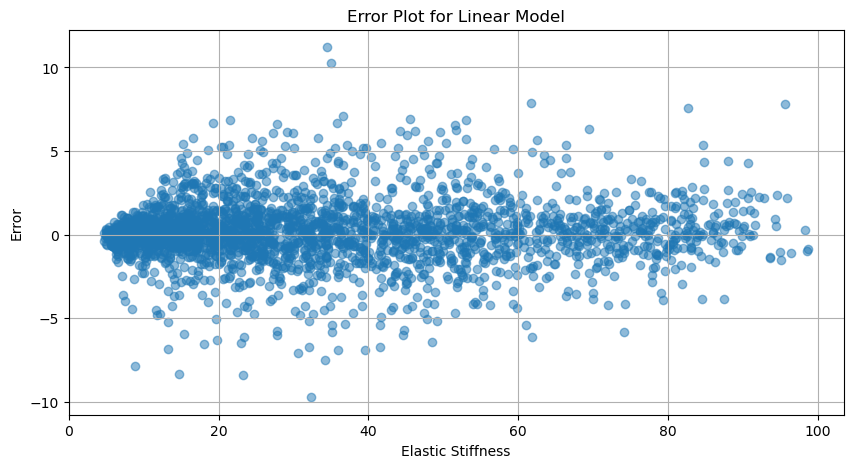

In [65]:
#error plot
error = test_y - y_test_pred
plt.figure(figsize=(10, 5))
plt.scatter(test_y, error, alpha=0.5)

plt.xlabel("Elastic Stiffness")
plt.ylabel("Error")
plt.title("Error Plot for Linear Model")
plt.grid()
plt.show()

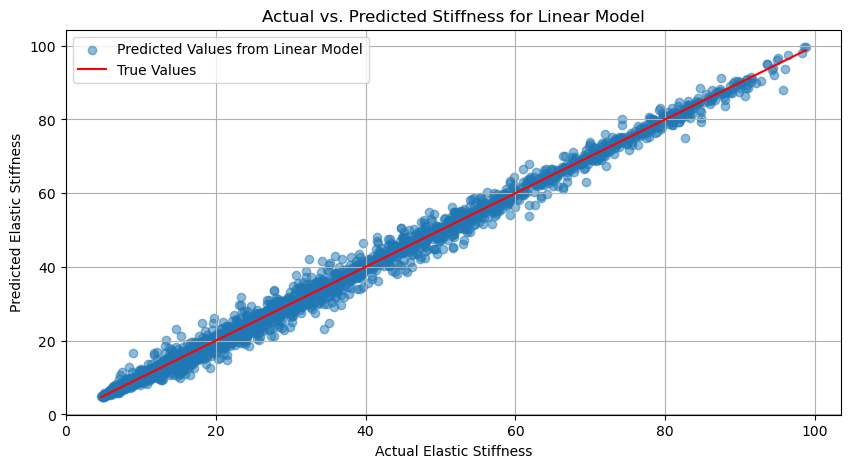

In [66]:
#Predicted vs Actual Stiffness
plt.figure(figsize=(10, 5))
plt.scatter(test_y, y_test_pred, alpha=0.5, label="Predicted Values from Linear Model")
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r-', label="True Values")
plt.xlabel("Actual Elastic Stiffness")
plt.ylabel("Predicted Elastic Stiffness")
plt.title("Actual vs. Predicted Stiffness for Linear Model")
plt.legend()
plt.grid()
plt.show()

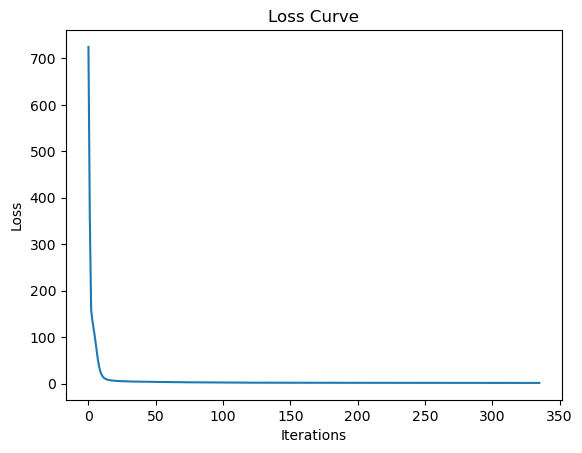

In [67]:
#loss curve
plt.plot(simple_mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

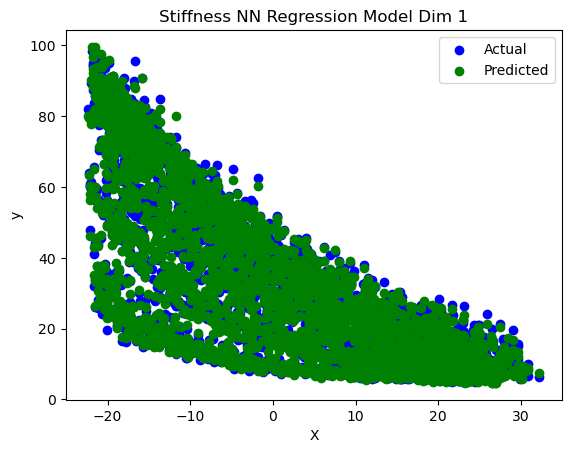

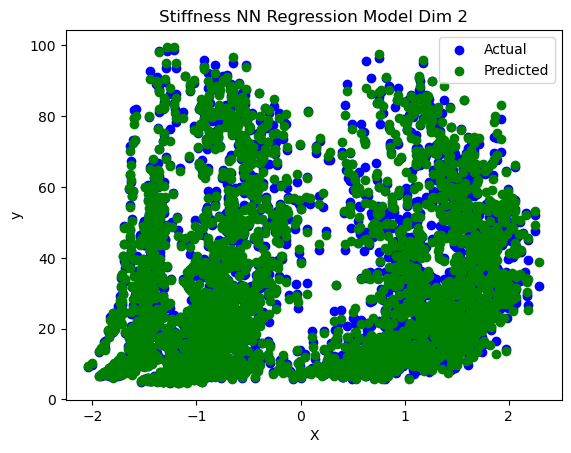

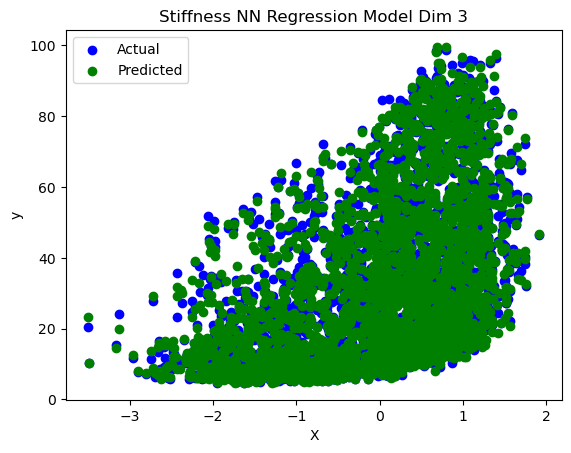

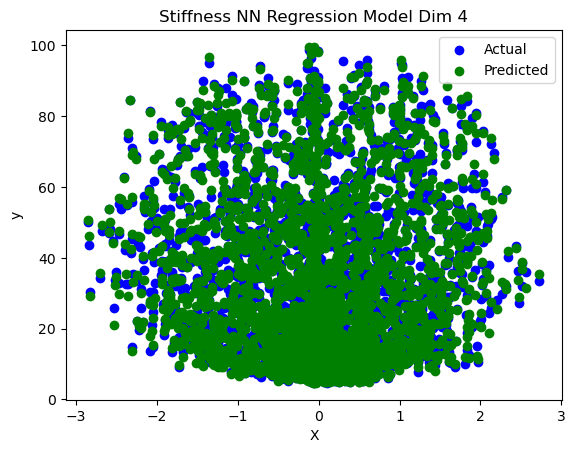

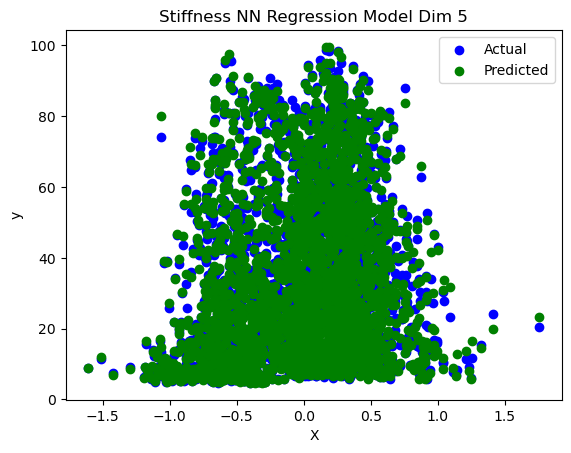

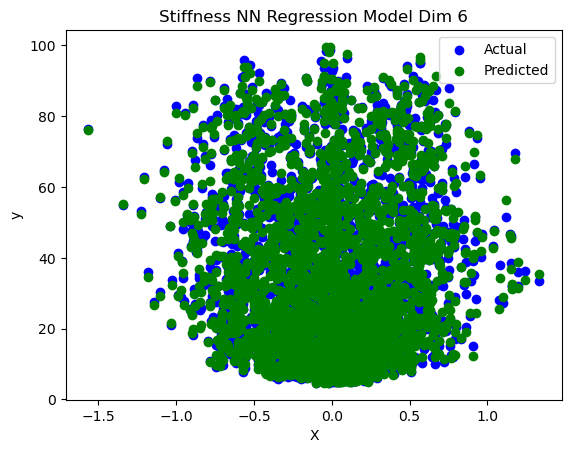

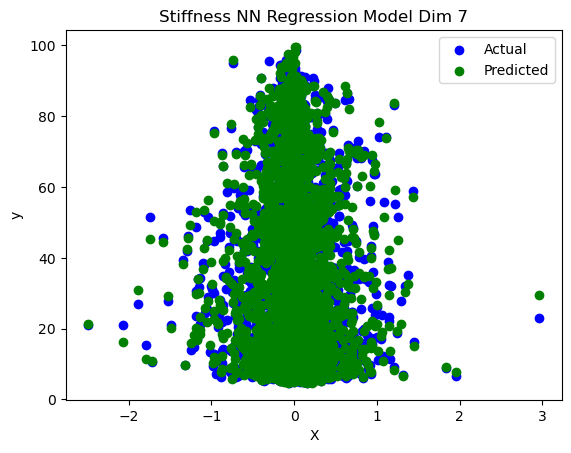

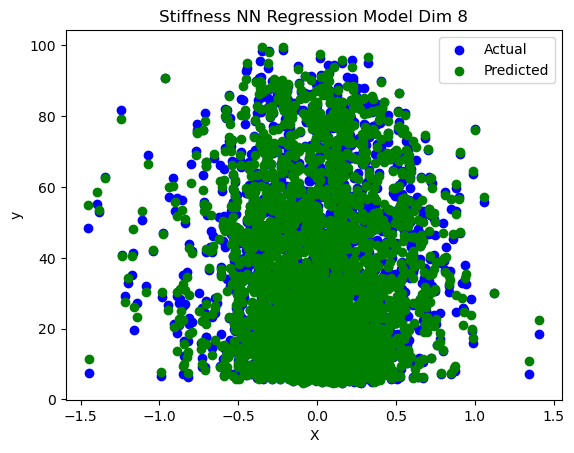

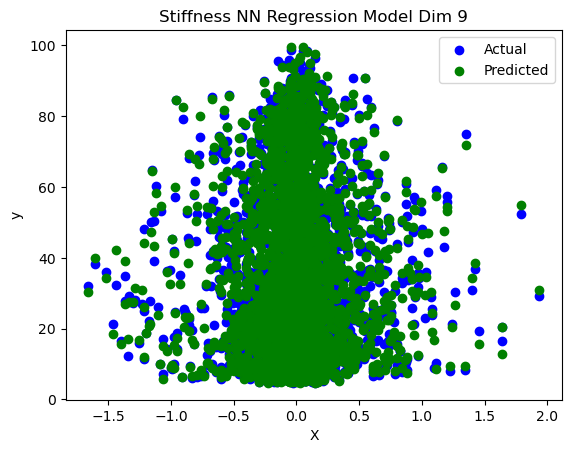

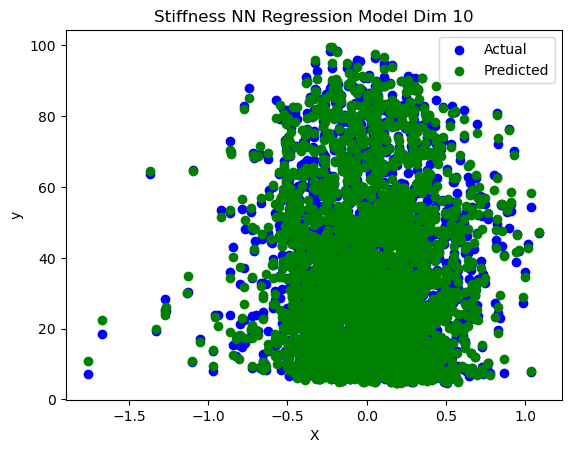

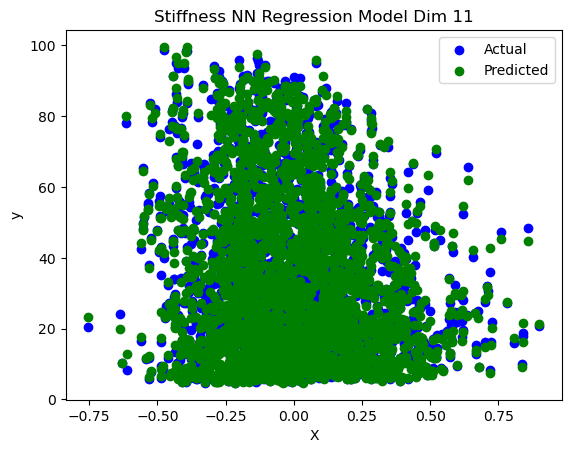

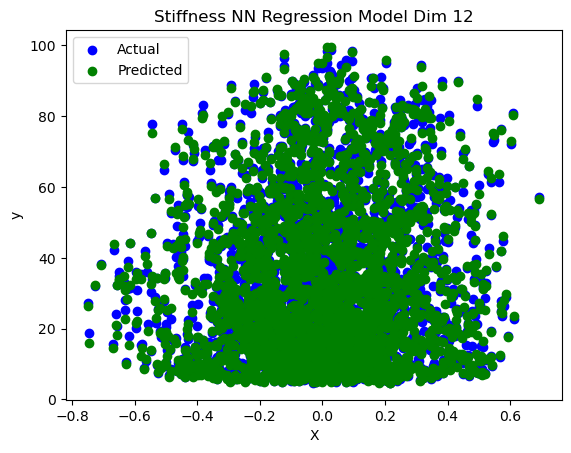

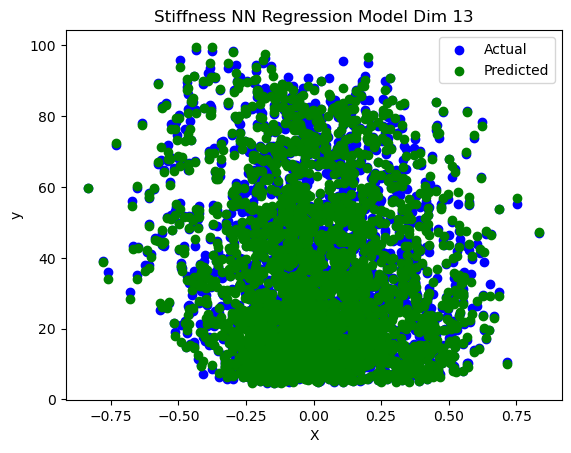

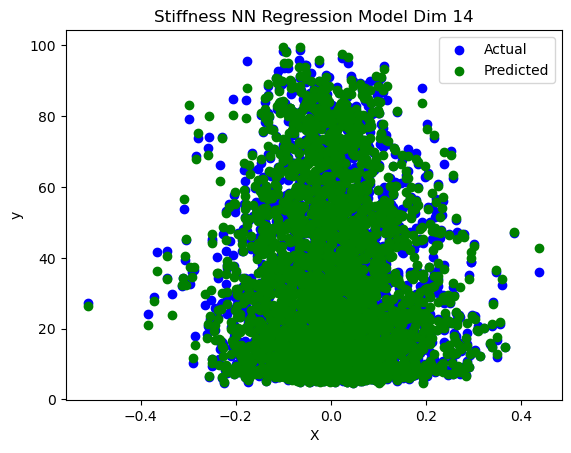

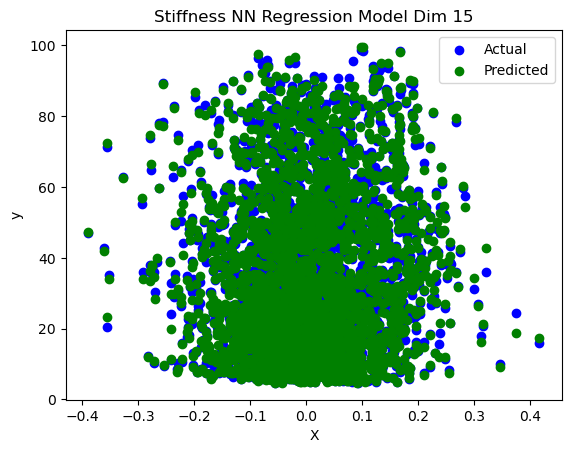

In [70]:

#plot for each physical characteristic
test_x_arr=test_x.to_numpy()
for i in range(15):
    plt.figure()
    plt.scatter(test_x_arr[:,i], test_y, color='b', label="Actual")
    plt.scatter(test_x_arr[:,i], y_test_pred, color='g', label="Predicted")
    plt.title("Stiffness NN Regression Model Dim " + str(i+1))
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

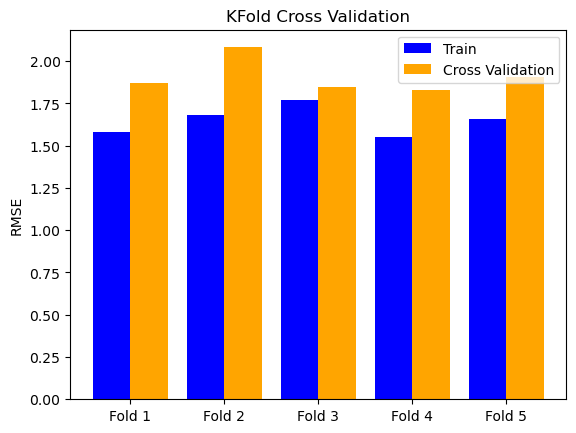

In [71]:
#K-fold cross validation plot
x_labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

x = np.arange(len(x_labels))
width = 0.4
plt.bar(x - width/2, train_cv_rmse, width=width, label='Train', color='blue')
plt.bar(x + width/2, cv_rmse, width=width, label='Cross Validation', color='orange')
plt.xticks(x, x_labels)
plt.ylabel('RMSE')
plt.title('KFold Cross Validation')
plt.legend()
plt.show()